In [12]:
import pandas as pd

df = pd.read_csv("E:/fall 25_26/machinr/Smart Student Performance Prediction System/Term_Project_Dataset_20K.csv")
df.head()


,age,gender,parent_income,num_siblings,family_support,commute_time_min,part_time_job,previous_gpa,num_failed_courses,high_school_grade,...,concentration_level,exam_anxiety_level,course_difficulty_rating,teacher_experience_years,class_size,num_prerequisites,course_type,final_score,final_grade,pass_fail
0,24.0,Female,22678.0,0.0,1.0,95.0,No,2.22,3.0,99.7,...,7.0,6.0,2.0,11.0,95.0,3.0,Elective,NaN,C,Pass
1,21.0,Male,17905.0,3.0,2.0,0.0,Yes,3.78,1.0,75.7,...,3.0,3.0,1.0,NaN,148.0,2.0,Elective,81.7,C,Pass
2,28.0,Male,NaN,0.0,0.0,67.0,No,NaN,4.0,93.4,...,1.0,8.0,1.0,32.0,55.0,3.0,Elective,77.3,B,Pass
3,25.0,Female,29391.0,4.0,4.0,83.0,Yes,1.84,4.0,69.7,...,6.0,10.0,5.0,30.0,42.0,1.0,Mandatory,78.5,B,Pass
4,22.0,Male,15522.0,0.0,4.0,58.0,Yes,3.38,0.0,62.2,...,10.0,5.0,3.0,31.0,123.0,1.0,Mandatory,60.3,D,Pass


In [13]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame (df.info()):")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nNumber of unique values for each column:")
print(df.nunique())

print("\nCount of missing values for each column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
    age  gender  parent_income  num_siblings  family_support  \
0  24.0  Female        22678.0           0.0             1.0   
1  21.0    Male        17905.0           3.0             2.0   
2  28.0    Male            NaN           0.0             0.0   
3  25.0  Female        29391.0           4.0             4.0   
4  22.0    Male        15522.0           0.0             4.0   

   commute_time_min part_time_job  previous_gpa  num_failed_courses  \
0              95.0            No          2.22                 3.0   
1               0.0           Yes          3.78                 1.0   
2              67.0            No           NaN                 4.0   
3              83.0           Yes          1.84                 4.0   
4              58.0           Yes          3.38                 0.0   

   high_school_grade  ...  concentration_level  exam_anxiety_level  \
0               99.7  ...                  7.0                 6.0   
1               7

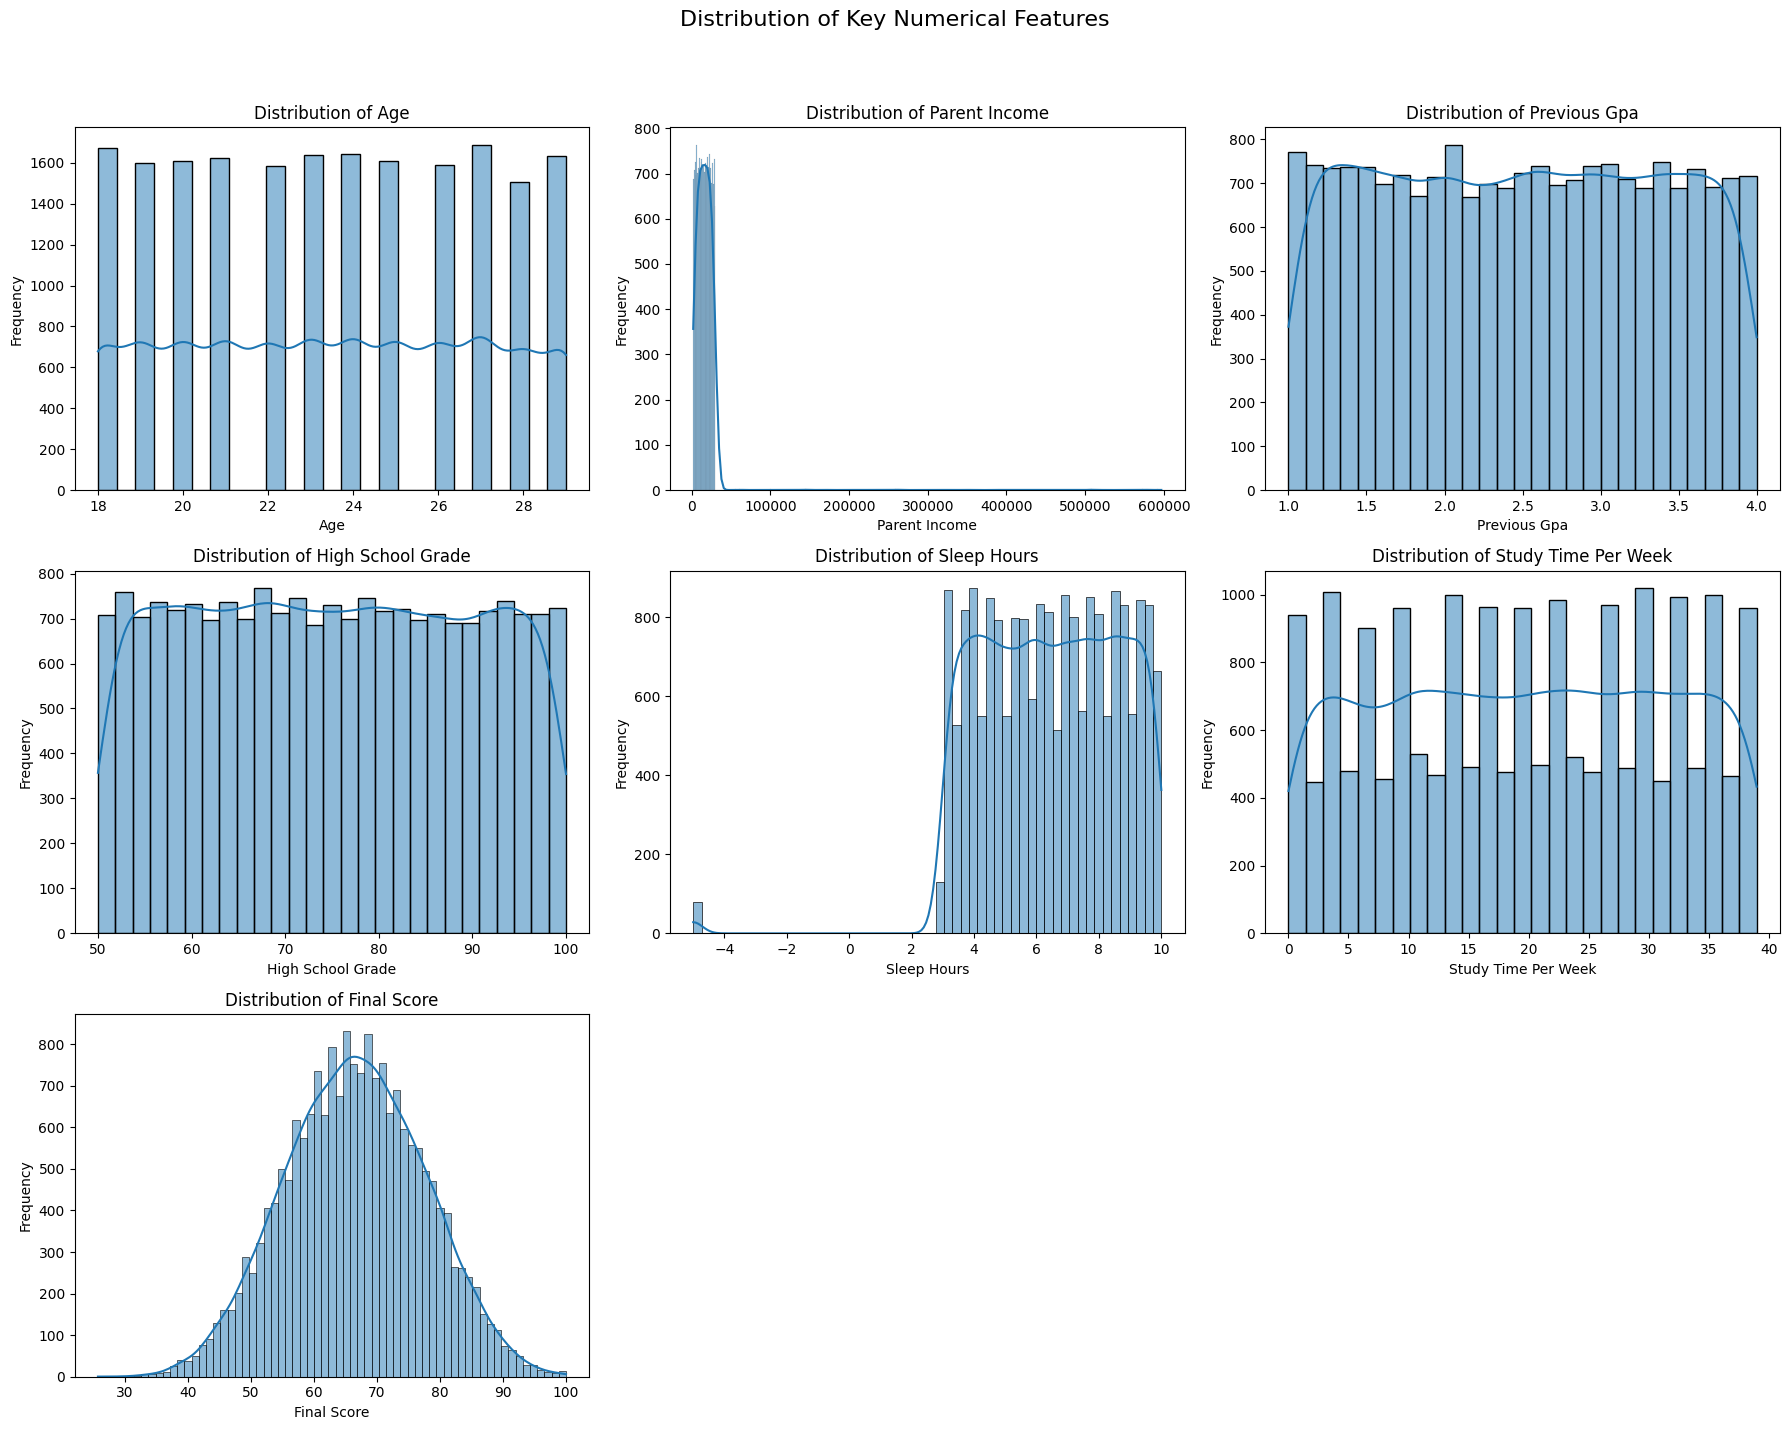

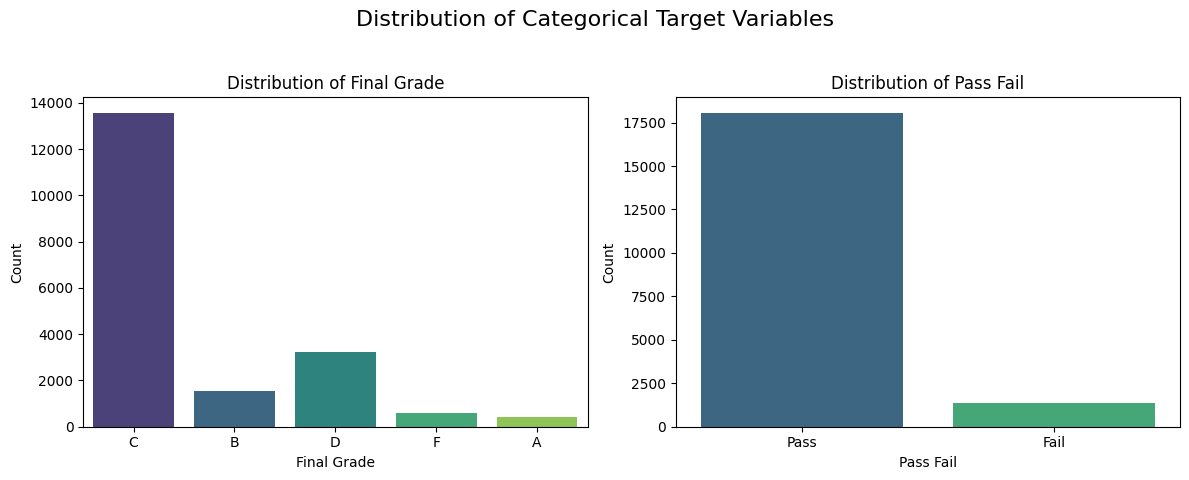

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for a selection of key numerical features
numerical_features = [
    'age', 'parent_income', 'previous_gpa', 'high_school_grade',
    'sleep_hours', 'study_time_per_week', 'final_score'
]

# Calculate number of rows and columns for subplots
n_cols_num = 3 # this can be adjusted for better layout
n_rows_num = (len(numerical_features) + n_cols_num - 1) // n_cols_num

plt.figure(figsize=(18, 5 * n_rows_num))
plt.suptitle('Distribution of Key Numerical Features', fontsize=16)

for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows_num, n_cols_num, i + 1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

# Count plots for categorical target variables
categorical_targets = ['final_grade', 'pass_fail']

n_cols_cat = 2
n_rows_cat = (len(categorical_targets) + n_cols_cat - 1) // n_cols_cat

plt.figure(figsize=(12, 5 * n_rows_cat))
plt.suptitle('Distribution of Categorical Target Variables', fontsize=16)

for i, feature in enumerate(categorical_targets):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    sns.countplot(data=df, x=feature, palette='viridis', hue=feature, legend=False)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

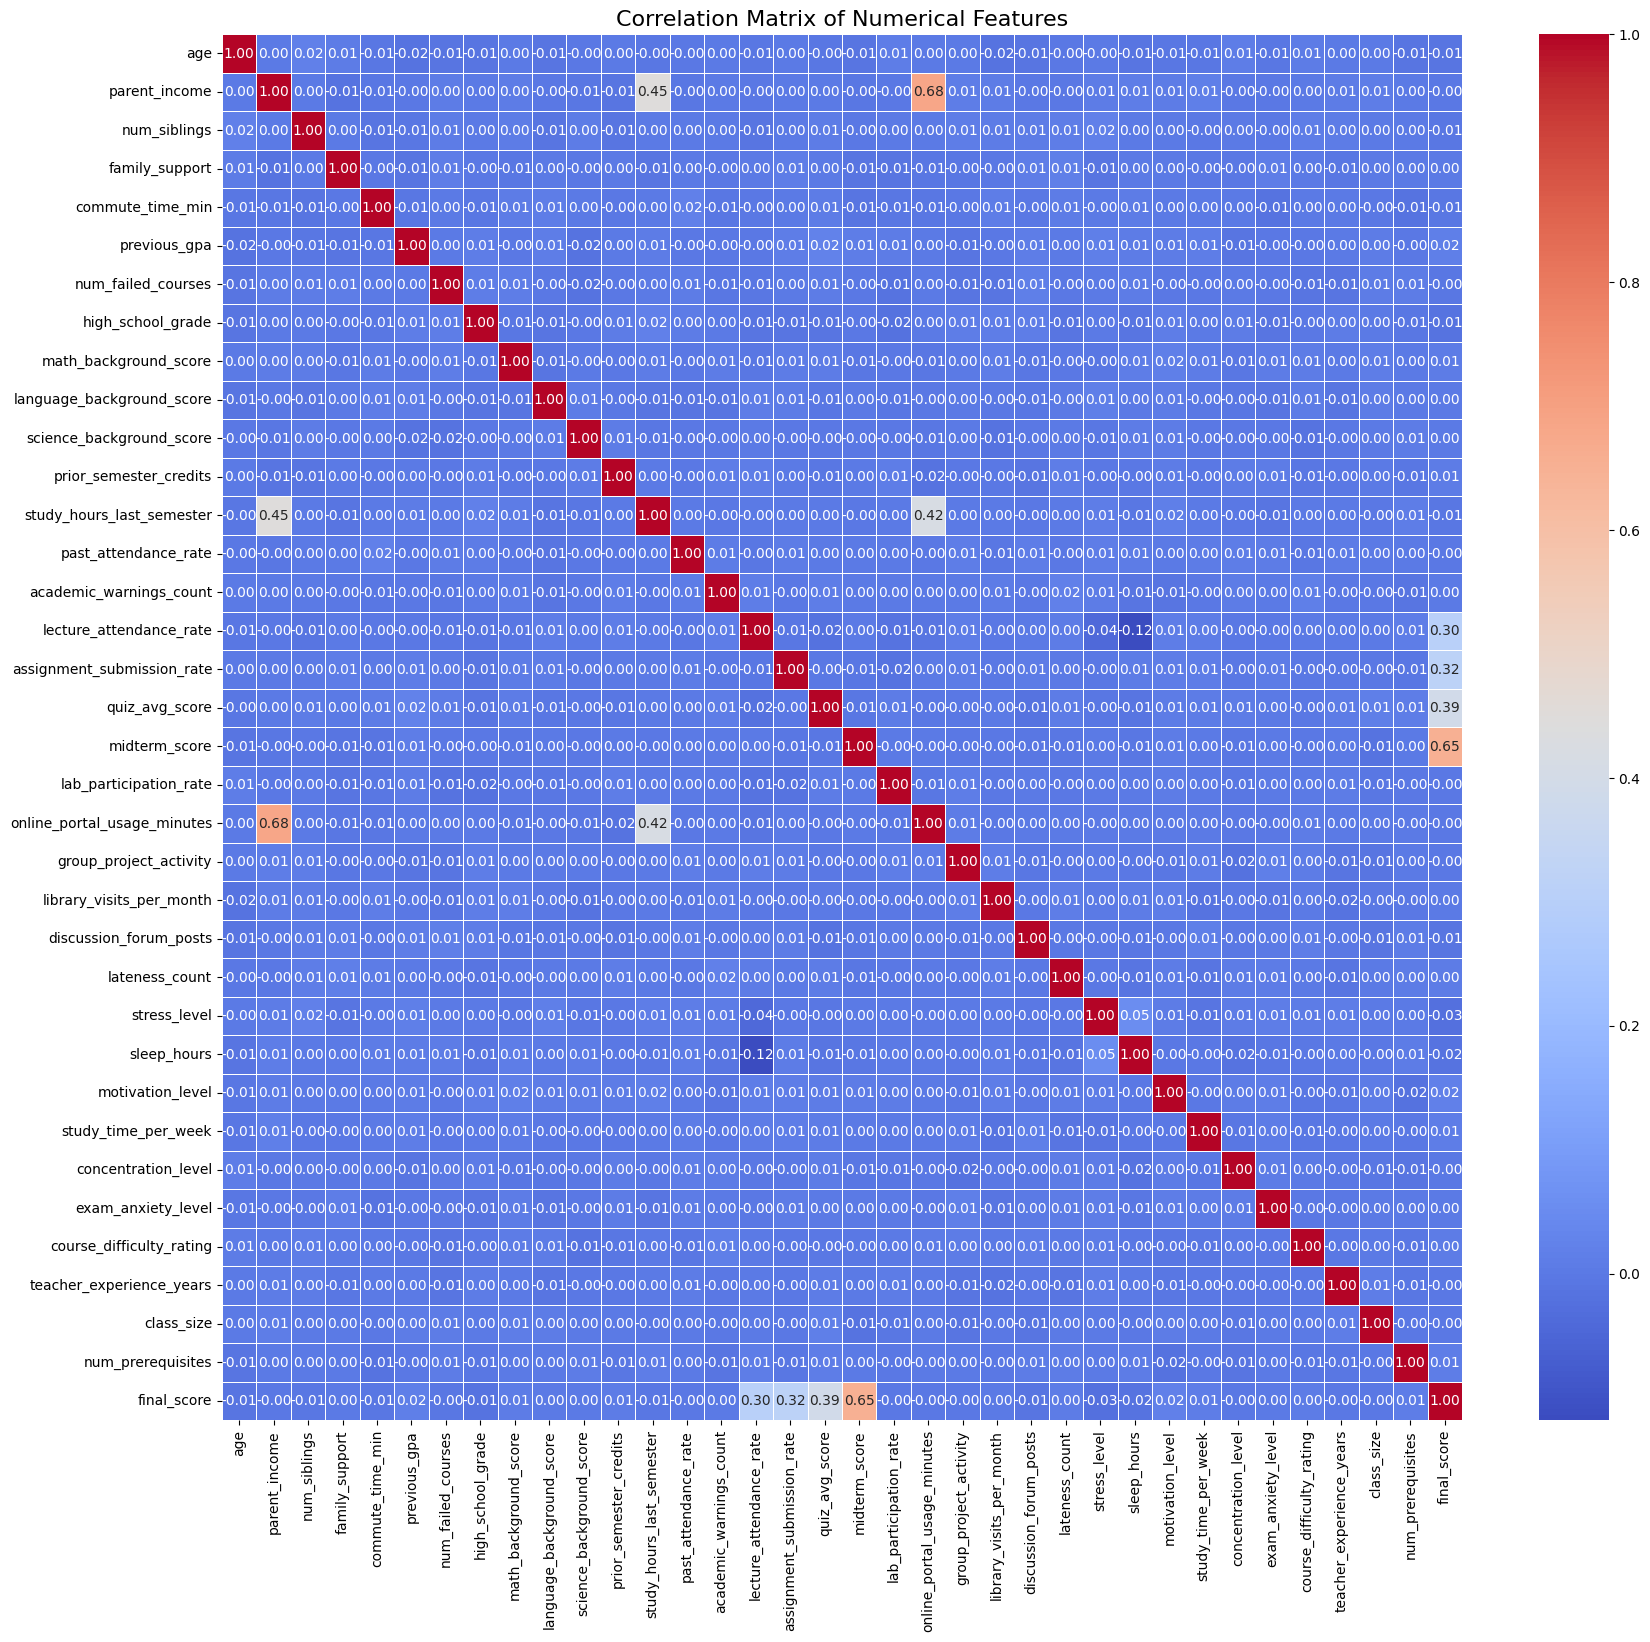

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18)) # Adjust figure size for better readability

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title('Correlation Matrix of Numerical Features', fontsize=16)

# Display the plot
plt.show()

In [7]:
print("Number of missing values per row (top 10):")
print(df.isnull().sum(axis=1).value_counts().head(10))

# Identify rows where all columns are missing
initial_rows = df.shape[0]
all_null_rows = df[df.isnull().all(axis=1)]
print(f"\nNumber of rows with all columns missing: {len(all_null_rows)}")

# If 600 rows are completely null, drop them
if len(all_null_rows) == 600:
    df.dropna(how='all', inplace=True)
    print(f"Dropped {initial_rows - df.shape[0]} rows with all missing values.")

# Verify that there are no remaining missing values
print("\nUpdated count of missing values for each column:")
print(df.isnull().sum())

Number of missing values per row (top 10):
1    7266
0    5761
2    4446
3    1862
4     505
5     133
6      20
7       5
8       2
Name: count, dtype: int64

Number of rows with all columns missing: 0

Updated count of missing values for each column:
age                            600
gender                         600
parent_income                  600
num_siblings                   600
family_support                 600
commute_time_min               600
part_time_job                  600
previous_gpa                   600
num_failed_courses             600
high_school_grade              600
math_background_score          600
language_background_score      600
science_background_score       600
prior_semester_credits         600
study_hours_last_semester      600
past_attendance_rate           600
academic_warnings_count        600
lecture_attendance_rate        600
assignment_submission_rate     600
quiz_avg_score                 600
midterm_score                  600
lab_particip

In [8]:
import numpy as np

# Identify numerical and categorical columns with missing values
numerical_cols_with_na = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()
categorical_cols_with_na = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()].tolist()

print("Numerical columns with missing values:", numerical_cols_with_na)
print("Categorical columns with missing values:", categorical_cols_with_na)

# Handle the anomalous 'sleep_hours' by replacing negative values with NaN
# This ensures that imputation uses valid sleep hour values.
initial_anomalies = df[df['sleep_hours'] < 0].shape[0]
if initial_anomalies > 0:
    df.loc[df['sleep_hours'] < 0, 'sleep_hours'] = np.nan
    print(f"\nReplaced {initial_anomalies} anomalous negative 'sleep_hours' with NaN.")

# Impute numerical columns with the median
for col in numerical_cols_with_na:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    # print(f"Imputed numerical column '{col}' with median: {median_val}")

# Impute categorical columns with the mode
for col in categorical_cols_with_na:
    mode_val = df[col].mode()[0] # .mode() can return multiple if frequencies are tied, take the first
    df[col] = df[col].fillna(mode_val)
    # print(f"Imputed categorical column '{col}' with mode: {mode_val}")

# Verify that there are no remaining missing values
print("\nUpdated count of missing values for each column after imputation:")
print(df.isnull().sum().to_string()) # Using to_string() for full output


Numerical columns with missing values: ['age', 'parent_income', 'num_siblings', 'family_support', 'commute_time_min', 'previous_gpa', 'num_failed_courses', 'high_school_grade', 'math_background_score', 'language_background_score', 'science_background_score', 'prior_semester_credits', 'study_hours_last_semester', 'past_attendance_rate', 'academic_warnings_count', 'lecture_attendance_rate', 'assignment_submission_rate', 'quiz_avg_score', 'midterm_score', 'lab_participation_rate', 'online_portal_usage_minutes', 'group_project_activity', 'library_visits_per_month', 'discussion_forum_posts', 'lateness_count', 'stress_level', 'sleep_hours', 'motivation_level', 'study_time_per_week', 'concentration_level', 'exam_anxiety_level', 'course_difficulty_rating', 'teacher_experience_years', 'class_size', 'num_prerequisites', 'final_score']
Categorical columns with missing values: ['gender', 'part_time_job', 'course_type', 'final_grade', 'pass_fail']

Replaced 79 anomalous negative 'sleep_hours' with 

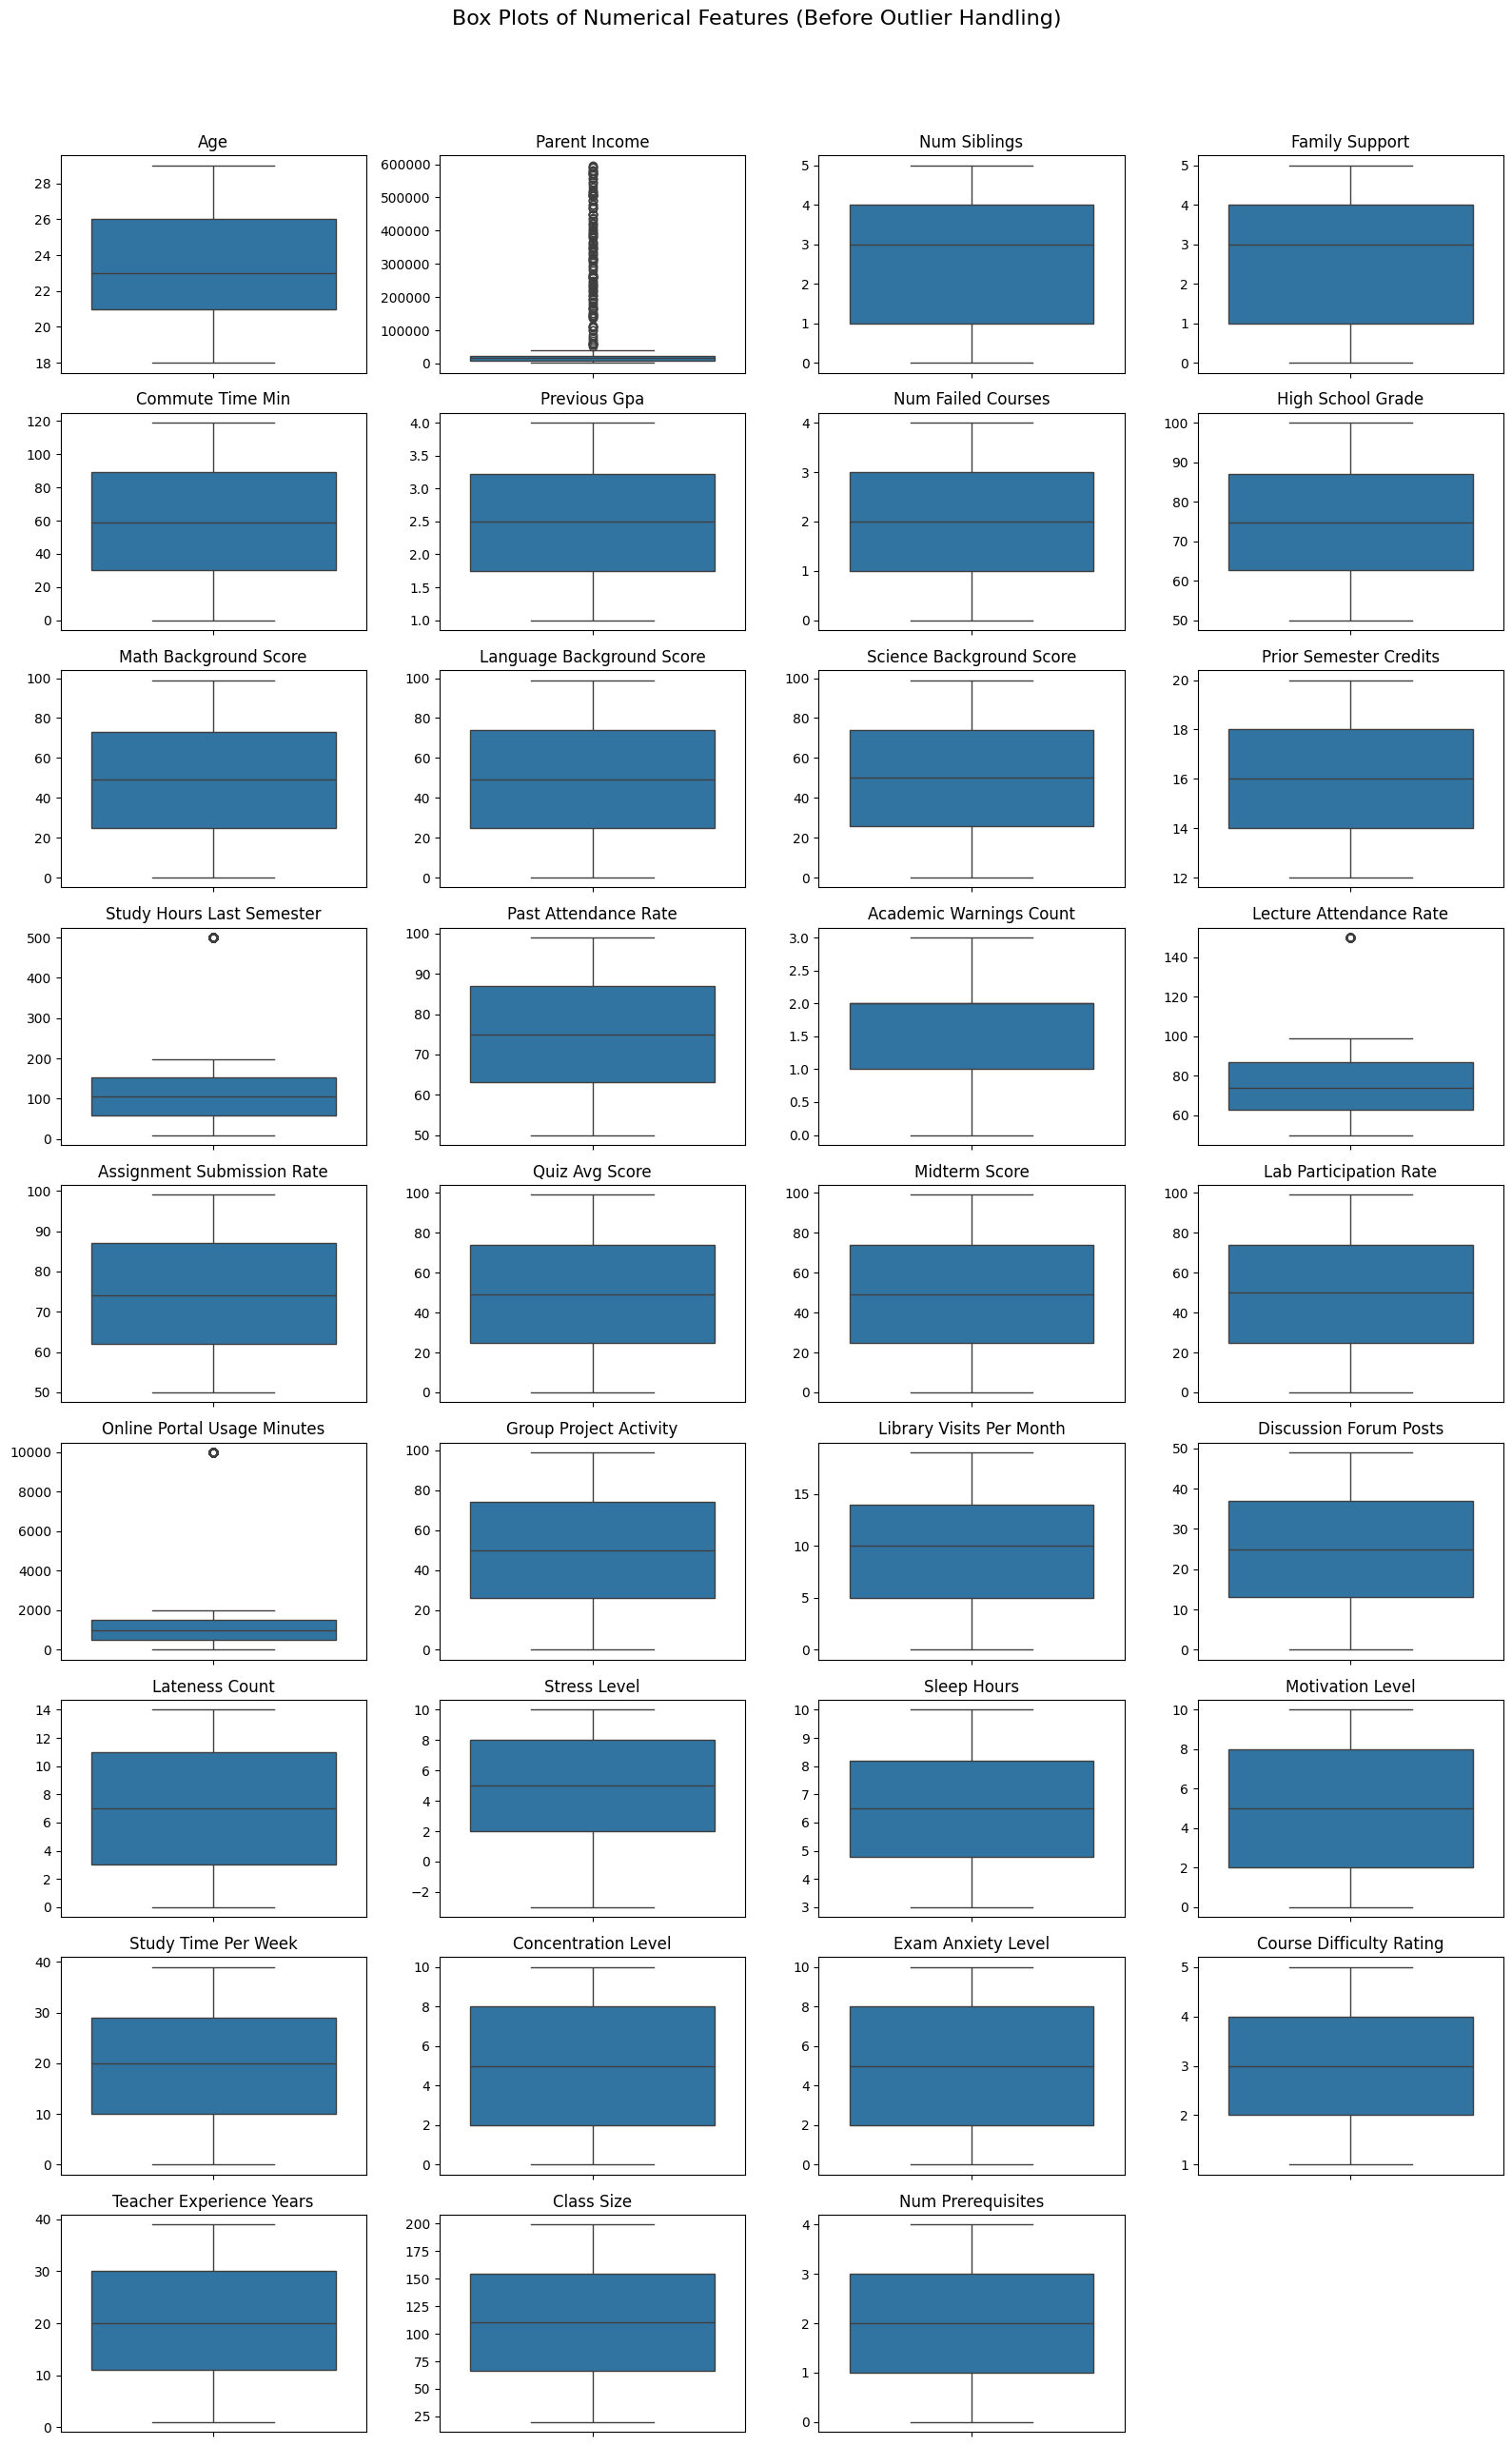

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude target variables if they are not to be treated for outliers (e.g., 'final_score' will be treated later)
# Also exclude columns that are essentially categorical or have a very small range, where 'outliers' might be valid categories
# based on the previous identification of potentially noisy/irrelevant features and descriptive statistics

# Define columns for which to generate initial box plots
plot_numerical_cols = [col for col in numerical_cols if col not in ['final_score', 'final_grade', 'pass_fail']]

# Calculate number of rows and columns for subplots dynamically
n_cols = 4 # Adjust for desired layout
n_rows = (len(plot_numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))
plt.suptitle('Box Plots of Numerical Features (Before Outlier Handling)', fontsize=16)

for i, col in enumerate(plot_numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col.replace("_", " ").title()}')
    plt.ylabel('') # Remove y-label to avoid clutter

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

Capped outliers for 'parent_income': Lower bound=-11041.12, Upper bound=43229.88
Capped outliers for 'study_hours_last_semester': Lower bound=-83.00, Upper bound=293.00
Capped outliers for 'online_portal_usage_minutes': Lower bound=-955.00, Upper bound=2965.00
Capped outliers for 'academic_warnings_count': Lower bound=-0.50, Upper bound=3.50
Capped outliers for 'midterm_score': Lower bound=-48.50, Upper bound=147.50
Capped outliers for 'final_score': Lower bound=36.75, Upper bound=96.35
Capped outliers for 'sleep_hours': Lower bound=-0.30, Upper bound=13.30

Outlier capping applied to specified numerical features.


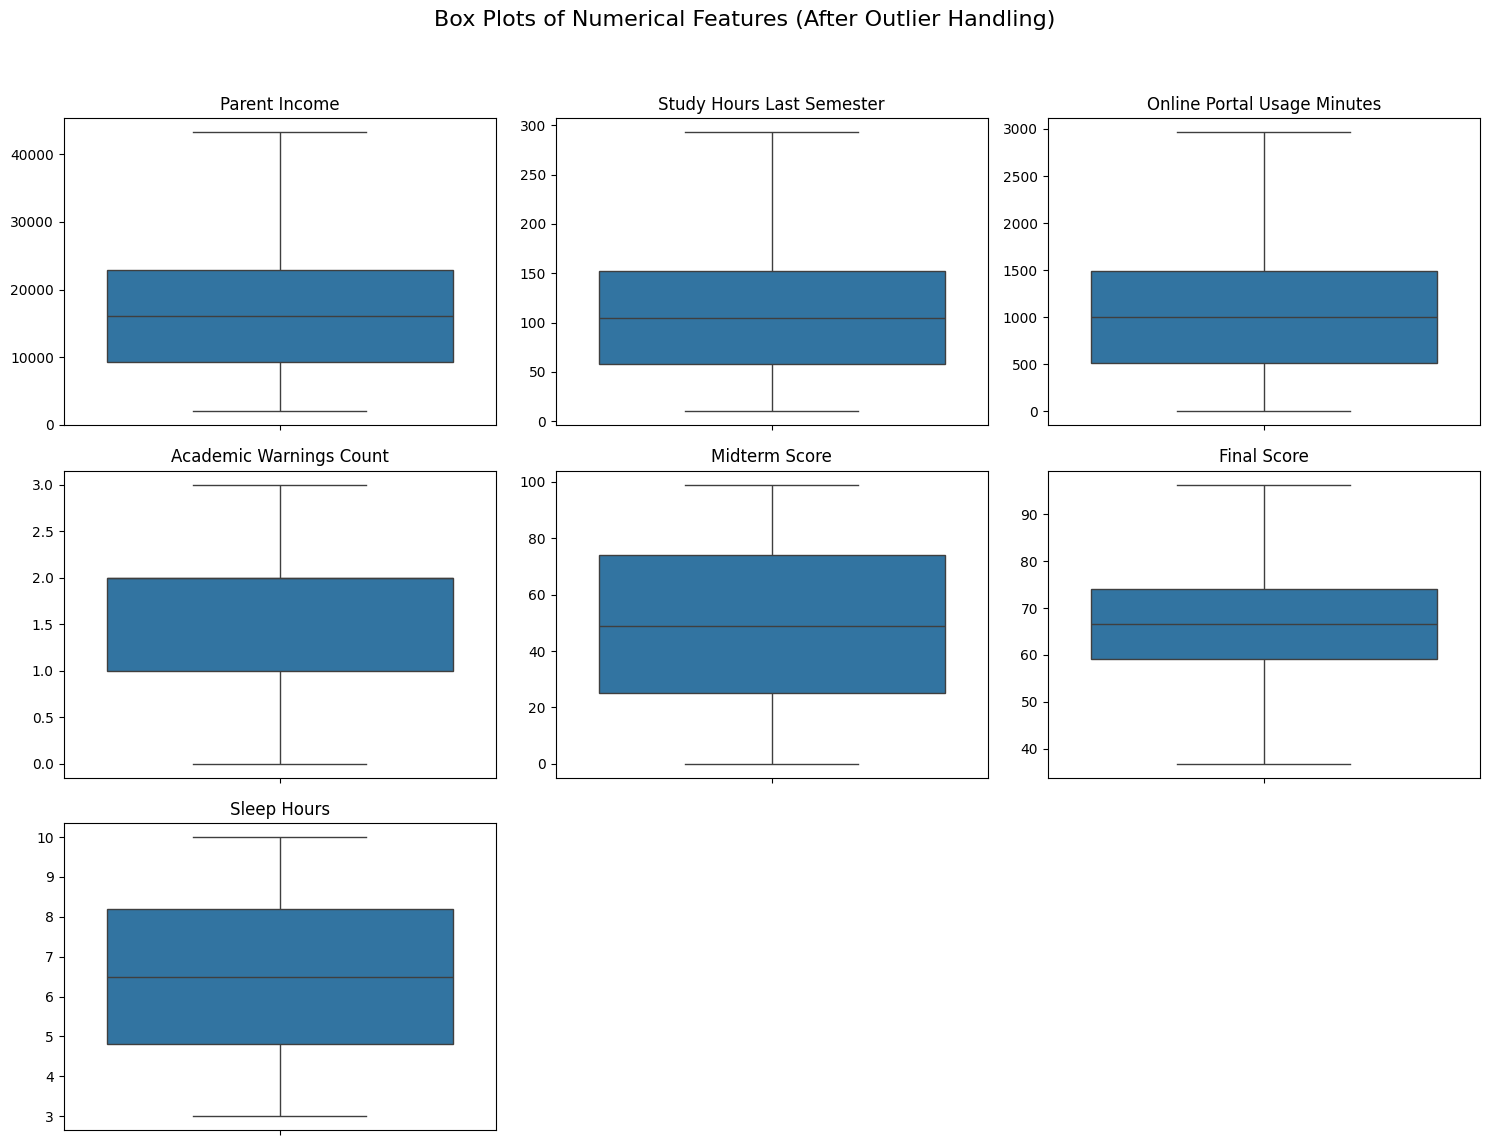


Descriptive statistics for features after outlier capping:
       parent_income  study_hours_last_semester  online_portal_usage_minutes  academic_warnings_count  midterm_score   final_score   sleep_hours
count   20000.000000               20000.000000                 20000.000000             20000.000000   20000.000000  20000.000000  20000.000000
mean    16209.308550                 105.884100                  1011.984550                 1.521950      49.628000     66.542285      6.499980
std      8247.107079                  56.452403                   592.529656                 1.106743      28.516516     10.860196      1.989297
min      2000.000000                  10.000000                     0.000000                 0.000000       0.000000     36.750000      3.000000
25%      9310.500000                  58.000000                   515.000000                 1.000000      25.000000     59.100000      4.800000
50%     16102.000000                 105.000000                  1004.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to apply IQR capping
outlier_columns = [
    'parent_income',
    'study_hours_last_semester',
    'online_portal_usage_minutes',
    'academic_warnings_count',
    'midterm_score',
    'final_score',
    'sleep_hours' # Already handled negative, now check for other extremes
]

# Function to apply IQR capping
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Capped outliers for '{col}': Lower bound={lower_bound:.2f}, Upper bound={upper_bound:.2f}")
    return df

# Apply capping to the identified columns
for col in outlier_columns:
    df = cap_outliers_iqr(df.copy(), col)

print("\nOutlier capping applied to specified numerical features.")

# Verify changes: Re-plot box plots for capped columns
n_cols_verify = 3 # Adjust for desired layout
n_rows_verify = (len(outlier_columns) + n_cols_verify - 1) // n_cols_verify

plt.figure(figsize=(n_cols_verify * 5, n_rows_verify * 4))
plt.suptitle('Box Plots of Numerical Features (After Outlier Handling)', fontsize=16)

for i, col in enumerate(outlier_columns):
    plt.subplot(n_rows_verify, n_cols_verify, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col.replace("_", " ").title()}')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Verify changes: Display descriptive statistics for capped columns
print("\nDescriptive statistics for features after outlier capping:")
print(df[outlier_columns].describe().to_string())

In [11]:
import pandas as pd

# Identify all categorical columns that are not target variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Exclude target variables ('final_grade', 'pass_fail')
# 'final_score' is numerical, so it's not in categorical_cols
nominal_features = [col for col in categorical_cols if col not in ['final_grade', 'pass_fail']]

print(f"Categorical features identified for one-hot encoding: {nominal_features}")

# Apply one-hot encoding for nominal categorical features
df_encoded = pd.get_dummies(df, columns=nominal_features, drop_first=True, dtype=int)

print("\nFirst 5 rows of the DataFrame after one-hot encoding:")
print(df_encoded.head())

print("\nConcise summary of the DataFrame after one-hot encoding (df_encoded.info()):")
df_encoded.info()

Categorical features identified for one-hot encoding: ['gender', 'part_time_job', 'course_type']

First 5 rows of the DataFrame after one-hot encoding:
    age  parent_income  num_siblings  family_support  commute_time_min  \
0  24.0        22678.0           0.0             1.0              95.0   
1  21.0        17905.0           3.0             2.0               0.0   
2  28.0        16102.0           0.0             0.0              67.0   
3  25.0        29391.0           4.0             4.0              83.0   
4  22.0        15522.0           0.0             4.0              58.0   

   previous_gpa  num_failed_courses  high_school_grade  math_background_score  \
0          2.22                 3.0               99.7                   34.0   
1          3.78                 1.0               75.7                   91.0   
2          2.50                 4.0               93.4                   32.0   
3          1.84                 4.0               69.7                   33.0  